In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import cv2

In [3]:
images = []
labels = []

In [4]:
path='C://Users//Ripple//Desktop//Python//OCR//archive//data//training_data'

In [5]:
dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

In [6]:
from matplotlib import pyplot as plt

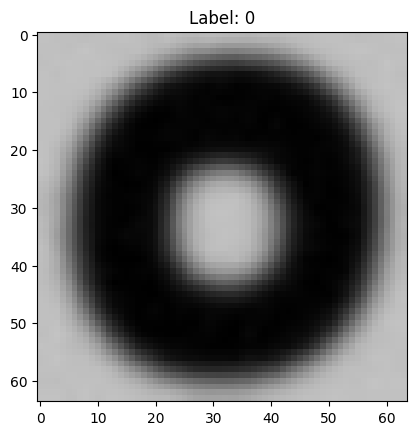

In [7]:
plt.imshow(images[0])
plt.title(f"Label: {labels[0]}")
plt.show()

In [8]:
images

[array([[[0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         ...,
         [0.75686276, 0.75686276, 0.75686276],
         [0.7607843 , 0.7607843 , 0.7607843 ],
         [0.7607843 , 0.7607843 , 0.7607843 ]],
 
        [[0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         ...,
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276]],
 
        [[0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         ...,
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7529412 , 0.7529412 , 0.7529412 ]],
 
        ...,
 
        [[0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.74901

In [9]:
X = np.array(images)
y = np.array(labels)
X.shape

(26228, 64, 64, 3)

In [10]:
X

array([[[[0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         ...,
         [0.75686276, 0.75686276, 0.75686276],
         [0.7607843 , 0.7607843 , 0.7607843 ],
         [0.7607843 , 0.7607843 , 0.7607843 ]],

        [[0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         ...,
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.75686276, 0.75686276, 0.75686276],
         [0.75686276, 0.75686276, 0.75686276]],

        [[0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         ...,
         [0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7529412 , 0.7529412 , 0.7529412 ],
         [0.7529412 , 0.7529412 , 0.7529412 ]],

        ...,

        [[0.7490196 , 0.7490196 , 0.7490196 ],
         [0.7490196 , 0.7490196 , 0.7490196 ]

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [12]:
y

array([ 0,  0,  0, ..., 35, 35, 35], dtype=int64)

In [13]:
len(set(y))

36

In [14]:
from sklearn.utils import shuffle
X_sh, y_sh = shuffle(X, y, random_state=42)

In [15]:
from keras.models import Sequential # type: ignore 
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense,Dropout# type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
#from tensorflow.keras.preprocessing.image import ImageDataGenerator # type: ignore



In [16]:
model = Sequential()

# Add layers to the model
model.add(MaxPooling2D())  # MaxPooling2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))  # Conv2D layer
model.add(MaxPooling2D())  # MaxPooling2D layer
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))  # Conv2D layer
model.add(MaxPooling2D())  # MaxPooling2D layer
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))  # Conv2D layer
model.add(Flatten())  # Flatten layer

# Add Dropout layers
model.add(Dropout(0.7))  # Dropout with rate 0.5 (50% probability of dropout)
model.add(Dense(units=128, activation='relu'))  # Dense layer
model.add(Dropout(0.3))  # Dropout with rate 0.3 (30% probability of dropout)
model.add(Dense(units=64, activation='relu'))  # Dense layer

# Final output layer
model.add(Dense(units=36, activation='softmax'))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [18]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=16, epochs=10)

Epoch 1/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.3883 - loss: 2.2183 - val_accuracy: 0.8896 - val_loss: 0.3865
Epoch 2/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8456 - loss: 0.5235 - val_accuracy: 0.9007 - val_loss: 0.3121
Epoch 3/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8763 - loss: 0.4021 - val_accuracy: 0.9236 - val_loss: 0.2305
Epoch 4/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8994 - loss: 0.3253 - val_accuracy: 0.9333 - val_loss: 0.1947
Epoch 5/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9110 - loss: 0.2796 - val_accuracy: 0.9422 - val_loss: 0.1753
Epoch 6/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9154 - loss: 0.2568 - val_accuracy: 0.9413 - val_loss: 0.1596
Epoch 7/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9212 - loss: 0.2350 - val_accuracy: 0.9546 - val_loss: 0.1419
Epoch 8/10
1312/1312 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9254 - loss: 0.2227 -

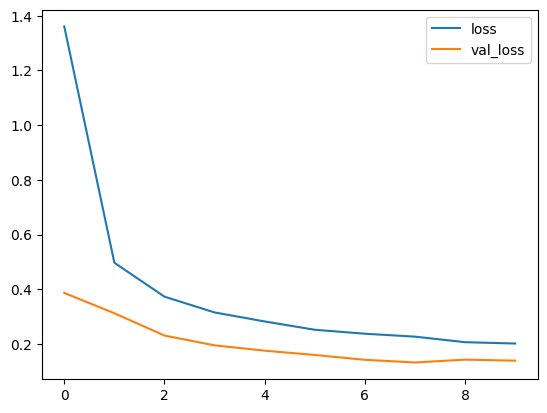

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])

In [20]:
test_images = []
test_labels = []

path = 'C://Users//Ripple//Desktop//Python//OCR//archive//data//testing_data'

dir_list = os.listdir(path)
for i in dir_list:
  dir = os.path.join(path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [21]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
X_test.shape

(1008, 64, 64, 3)

In [22]:
preds = model.predict(X_test)
preds.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


(1008, 36)

In [23]:
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))

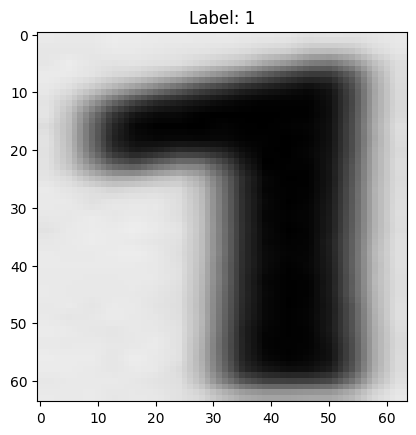

In [24]:
plt.imshow(X_test[29])
plt.title(f"Label: {predicted_labels[29]}")
plt.show()

In [25]:
y_test = le.fit_transform(y_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9515 - loss: 0.0899
Test Accuracy: 0.97817462682724


In [26]:
from PIL import Image, ImageOps

In [86]:
image_path='C://Users//Ripple//Desktop//Python//OCR//G.png'

In [87]:
test_imagesss = []
img1 = cv2.imread(image_path)
img1 = cv2.resize(img1, (64, 64))
img1 = np.array(img1, dtype=np.float32)
img1 = img1 / 255.0  # Normalize the image
test_imagesss.append(img1)
test_imagesss = np.array(test_imagesss)  # Convert list to numpy array

# Ensure the image data is in the correct shape for the model
test_imagesss = np.expand_dims(test_imagesss, axis=0) if len(test_imagesss.shape) == 3 else test_imagesss

In [88]:
preds = model.predict(test_imagesss)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [89]:
print(preds.shape)

(1, 36)


In [90]:
predicted_labels = le.inverse_transform(np.argmax(preds, axis=1))

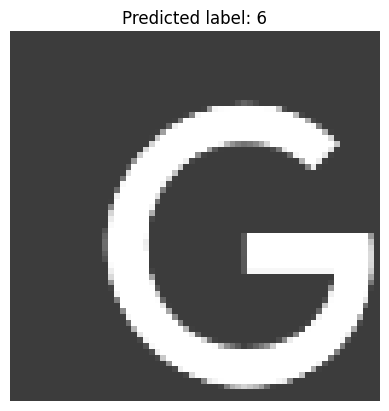

In [91]:
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for correct color display
plt.title(f'Predicted label: {predicted_labels[0]}')
plt.axis('off')  # Hide axes
plt.show()